<hr style="border:1px solid #808080">                                                                                                                   </hr>
<h1 style="color:#0176DE;text-align:center;margin:0;padding-top:0;"> <b>Ayudantía 2 - Python para computación científica</b>                                                                           </h1>
<h1 style="color:#0176DE;text-align:center;margin:0;padding-top:0;"> <b>IBM/ICE2020 Introducción a la Biomecánica</b>                                                                           </h1>
<p style=padding:0;margin:0>
<h3 style="color:#c1ccdb;text-align:center;margin:0;padding:0;"> Profesor - <span style="color:#dbdbdb;text-align:center;"><b>Daniel Hurtado</b></span></h3>
<h3 style="color:#c1ccdb;text-align:center;margin:0;padding:0;">Ayudantes - <span style="color:#dbdbdb;text-align:center;"><b>Bastián Herrera, Victoria Alfaro, Jorge Villagra</b></span>                               </h3> 
</p>
<h4 style="color:#dbdbdb;text-align:center;margin:0;padding:0;">Instituto de Ingeniería Biológica y Médica<br>Escuela de Ingeniería<br>  Pontificia Universidad Católica de Chile <br>    </h4>
<hr style="border:1px solid #808080">                                                                                                                   </hr>

## Introducción
La biomecánica estudia el comportamiento mecánico de los tejidos blandos, usualmente sometidos a grandes deformaciones, y que presentan relaciones no lineales entre tensión y deformación. Para describir cuantitativamente este comportamiento, es necesario saber definir un dominio $\Omega$ que represente el cuerpo a estudiar, cómo aplicar deformaciones, graficar sus tensiones y extraer resultados que se puedan entender fácilmente. 

En esta ayudantía cubriremos las herramientas y librerías de Python necesarias para este curso, y para resolver problemas de computación científica en general.

## Instalación de Python
Existen diversos lenguajes de programación (e.g. C++, MATLAB/Octave, Julia, etc.) y software (Abaqus, FEBio, COMSOL Multiphysics) para simulación computacional y experimentación numérica de modelos biomecánicos definidos en geometrías arbitrarias. En este curso, usaremos **Python** como herramienta de computación científica, junto con algunas librerías.

Lo mejor es instalar Python directamente desde su [sitio web](https://www.python.org/downloads/). Alternativamente, es posible usar Anaconda u otra distribución de Python, pero usualmente generan muchos problemas para poder instalar librerías más avanzadas, como FEniCSx. También es posible correr código en línea usando [Google Colab](https://colab.research.google.com), lo que es ideal para cuando uno no dispone de una CPU o GPU con suficiente poder de procesamiento.
## Instalación de packages/librerías
Existen muchos paquetes y librerías para ampliar las funcionalidades que ofrece Python. Usualmente éstas se instalan vía `pip install` + `library-name` en la consola de comandos Windows/Linux. 
### Jupyter Notebooks
Jupyter es una plataforma basada en web para programar de forma interactiva en celdas, con anotaciones en el lenguaje [Markdown](https://www.markdownguide.org/basic-syntax/). Para instalarlo, deben escribir en la consola `pip install jupyterlab` para Jupyter Lab, donde podrán crear Jupyter Notebooks y correrlos en un navegador web. Para iniciar Jupyter Lab, deben escribir en la consola `jupyter lab`.
### Librerías para computación científica
- `NumPy`: mediante `pip install numpy`. [Documentación y tutoriales](https://numpy.org/doc/)
- `Matplotlib`: mediante `pip install matplotlib`. [Documentación y tutoriales](https://matplotlib.org/stable/users/index.html)
- `SciPy`: mediante `pip install scipy`. [Documentación](https://docs.scipy.org/doc/scipy/)

## Importar librerías y archivos .py externos
    

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp

import sys
import os
import time

sys.path.append("./src/")
from my_func import damped_oscillation

## Operaciones básicas en Python

In [2]:
a = 2       # El valor 2 (int) está asignado a "a"
b = 3.      # El valor 3 (float) está asignado a "b"
b += a      # Se le reasigna a b su valor referenciado, más el referenciado en a
b

5.0

In [3]:
c = 2E3     # Se pueden declarar números en notación científica
d = b*c     # Multiplicación con *, división con /
e = c**b    # Exponenciación con **, no con ^

## Operaciones básicas en NumPy

In [4]:
R = 4
area = np.pi*R**2
area

50.26548245743669

In [5]:
Rs = np.array([4,5,6])      # Creación de arrays a partir de listas
areas = np.pi*Rs**2
areas

array([ 50.26548246,  78.53981634, 113.09733553])

In [6]:
L = np.array(               # Creación de arrays n-dimensionales a partir de listas anidadas
    [
        [1,0,0],
        [1,1,0],
        [1,1,1]
    ]
)
L

array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [7]:
print(L.shape)

(3, 3)


In [8]:
L.size

9

In [9]:
L[0]

array([1, 0, 0])

In [10]:
L[0,1]

0

In [11]:
L[:,:]

array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [12]:
L[0,-1]

0

In [13]:
rango = np.arange(0,50)            # Todos los números entre 0 y 49.
intervalo = np.linspace(0,50,12)   # El intervalo [0,50], dividido en 12 partes iguales.

In [29]:
intervalo

array([ 0.        ,  4.54545455,  9.09090909, 13.63636364, 18.18181818,
       22.72727273, 27.27272727, 31.81818182, 36.36363636, 40.90909091,
       45.45454545, 50.        ])

In [31]:
intervalo_transformado = 2*intervalo + 5
intervalo_transformado

array([  5.        ,  14.09090909,  23.18181818,  32.27272727,
        41.36363636,  50.45454545,  59.54545455,  68.63636364,
        77.72727273,  86.81818182,  95.90909091, 105.        ])

In [33]:
type(L)

numpy.ndarray

## Álgebra lineal con _arrays_ de NumPy
Existen las clases `numpy.array` y `numpy.matrix`, que tienen diferencias sutiles en la sintaxis de algunas operaciones. Nos quedaremos con la clase `numpy.array`.

In [34]:
A = np.array(           # Matriz de 3x3
    [
        [1,2,3],
        [1,0,1],
        [2,1,-1]
    ]
)
B = np.array(           # Matriz de 3x3
    [
        [2,-1,0],
        [-1,2,-1],
        [0,-1,2]
    ]
)

b = np.array([4,2,0,1])   # Vector fila, de 1x4
b.T                     # Transposición, queda un vector columna de 4x1

array([4, 2, 0, 1])

In [35]:
detA = np.linalg.det(A)     # Determinante de una matriz
Ainv = np.linalg.inv(A)     # Inversa de una matriz
assert np.array_equal(np.eye(3), A@Ainv)

In [36]:
A@Ainv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Resolución de un sistema lineal $Ax=b$

In [37]:
n = 2000

A = np.diag(-1*np.ones(n)) + np.diag(2*np.ones(n-1), k=1) + np.diag(2*np.ones(n-1), k=-1)
b = np.random.rand(n)

# Forma 1, invirtiendo
t1 = time.time()
Ainv = np.linalg.inv(A)
print(Ainv.shape)
x = Ainv@b.T
# print(x)
print(f"Tiempo transcurrido: {time.time() - t1}")

# Forma 2, usando np.linalg.solve
t2 = time.time()
x = np.linalg.solve(A, b.T)
# print(x)
print(f"Tiempo transcurrido: {time.time() - t2}")

(2000, 2000)
Tiempo transcurrido: 0.5340123176574707
Tiempo transcurrido: 0.12492084503173828


### Diagonalización

In [19]:
M = np.array(           
    [
        [1,2,3],
        [1,0,1],
        [2,1,-1]
    ]
)

try: 
    eigvals, eigvecs = np.linalg.eig(M)
    print(eigvecs@np.diag(eigvals)@np.linalg.inv(eigvecs))
    assert np.allclose(M, eigvecs@np.diag(eigvals)@np.linalg.inv(eigvecs), atol=1E-10)
except:
    print("La matriz M no es diagonalizable.")

[[ 1.00000000e+00  2.00000000e+00  3.00000000e+00]
 [ 1.00000000e+00 -3.49319088e-16  1.00000000e+00]
 [ 2.00000000e+00  1.00000000e+00 -1.00000000e+00]]


### Descomposición de Cholesky $A=LL^T$

In [20]:
try:
    L_A = np.linalg.cholesky(A)
except:
    print("La matriz no A no es simétrica y definida positiva.")

try:
    L_B = np.linalg.cholesky(B)
except:
    print("La matriz no B no es simétrica y definida positiva.")

L_B@L_B.T       # Descomposición de Cholesky

La matriz no A no es simétrica y definida positiva.


array([[ 2., -1.,  0.],
       [-1.,  2., -1.],
       [ 0., -1.,  2.]])

## Operaciones y gráficos de funciones
Necesitamos una forma para representar funciones continuas de forma discreta en un computador. Para esto, discretizamos un dominio continuo (e.g. $[0,1]$) en una sucesión de $N$ puntos $\{x_i\}$, $i=0,\dots,N-1$.

Probaremos con la función $f(x)=e^{-kx}\cos(\omega x)$, que está definida en un archivo aparte `src/my_func.py`.

In [21]:
x = np.linspace(0,10,200)

k1 = 2
omega1 = 5
k2 = 4
omega2 = 10

osc1 = damped_oscillation(x, k=k1, omega=omega1)
osc2 = damped_oscillation(x, k=k2, omega=omega2)

Ahora, usamos el módulo `pyplot` de `matplotlib`, que importamos como `plt`. Podemos definir figuras de dos formas.

Forma 1: definir figura y ejes manualmente. Esto permite personalizar más fácilmente los elementos del gráfico, sumar más elementos, etc.

/tmp/ipykernel_16173/2271405337.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


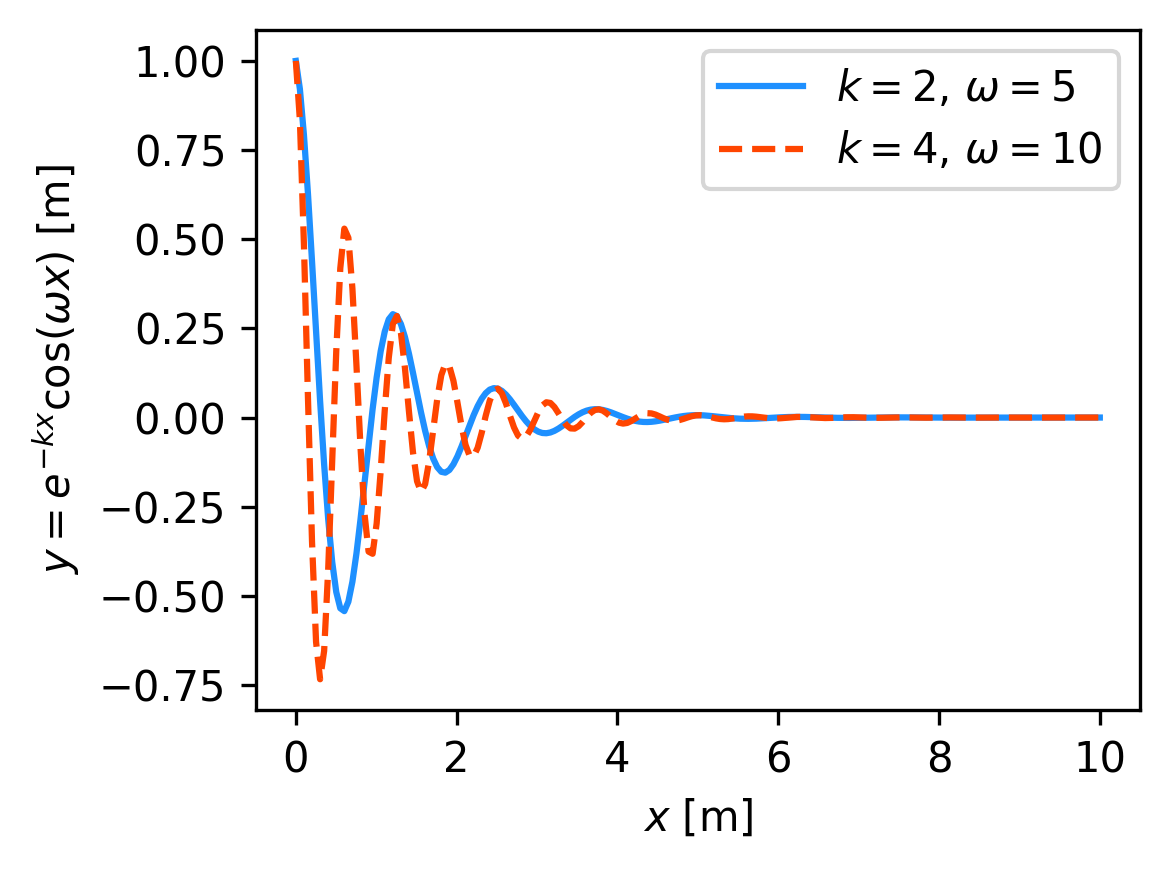

In [22]:
fig, ax = plt.subplots(figsize=(4,3), dpi=300, layout='constrained')

ax.plot(x, osc1, color='dodgerblue', label=rf'$k=${k1}, $\omega=${omega1}')
ax.plot(x, osc2, '--', color='orangered', label=rf'$k=${k2}, $\omega=${omega2}')

ax.set_xlabel(r"$x$ [m]")
ax.set_ylabel(r"$y = e^{-kx}\cos(\omega x)$ [m]")

ax.legend(loc='upper right')

fig.tight_layout()

plt.show()

Forma 2: no instanciar una figura ni ejes. Se pueden hacer (casi) las mismas cosas, pero es recomendable para variables que uno quiere graficar rápidamente y ver cómo se comportan. Para gráficos con más sub-gráficos, es necesario usar `plt.subplots((nrows, ncols))`.

/tmp/ipykernel_16173/1004464526.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


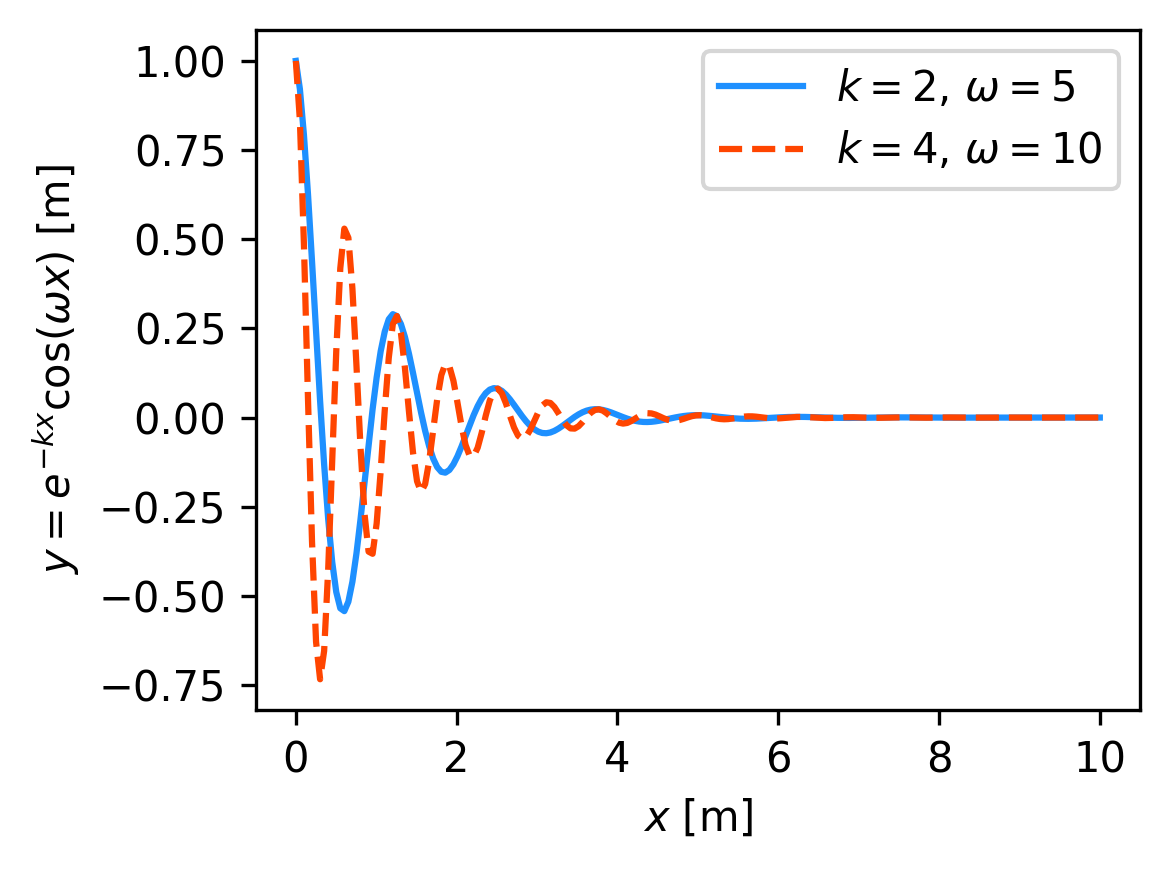

In [23]:
plt.figure(figsize=(4,3), dpi=300, layout='constrained')
plt.plot(x, osc1, color='dodgerblue', label=rf'$k=${k1}, $\omega=${omega1}')
plt.plot(x, osc2, '--', color='orangered', label=rf'$k=${k2}, $\omega=${omega2}')

plt.xlabel(r"$x$ [m]")
plt.ylabel(r"$y = e^{-kx}\cos(\omega x)$ [m]")

plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

## Creación de dominios y transformación de coordenadas
Para mostrar la configuración inicial y actual de un determinado dominio, es necesario definirlo y aplicarle una función $\varphi$, que conocemos como el **mapeo de deformación**. Usaremos la función `numpy.meshgrid` para crear coordenadas con las que podremos trabajar.

In [24]:
R = np.linspace(5, 10, 50)
T = np.linspace(0, (7/4)*np.pi, 60)
RR, TT = np.meshgrid(R, T)

(4.75, 10.25, -0.2748893571891069, 5.772676500971245)

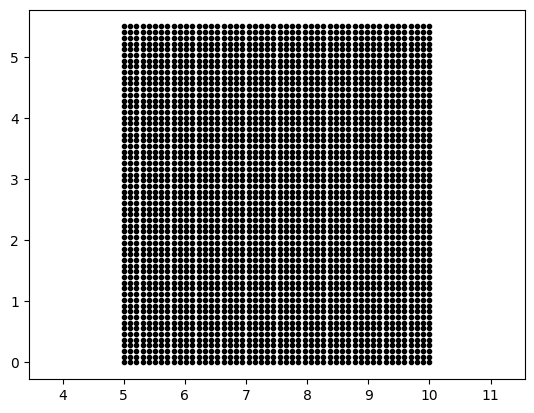

In [25]:
plt.figure()
plt.plot(RR, TT, '.', color='black')
plt.axis('equal')

(-10.996278916796255,
 10.999822805561726,
 -10.991583880390564,
 10.998671029936313)

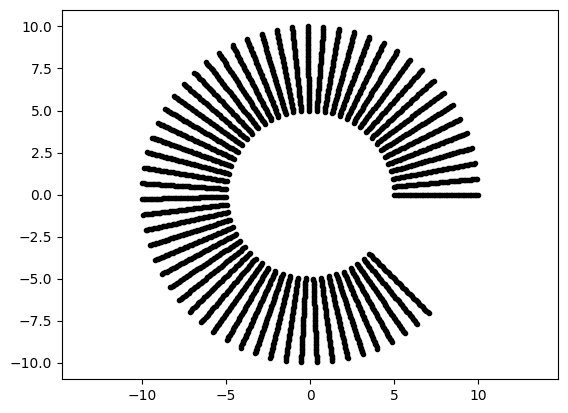

In [26]:
XX = RR*np.cos(TT)
YY = RR*np.sin(TT)

plt.figure()
plt.plot(XX, YY, '.', color='black')
plt.axis('equal')

In [27]:
def phi(R, T):
    r = R**2/8
    t = T/10
    return r, t

rr, tt = phi(RR,TT)

xx = rr*np.cos(tt)
yy = rr*np.sin(tt)

(-11.121278916796255,
 13.624822805561726,
 -10.991583880390564,
 10.998671029936313)

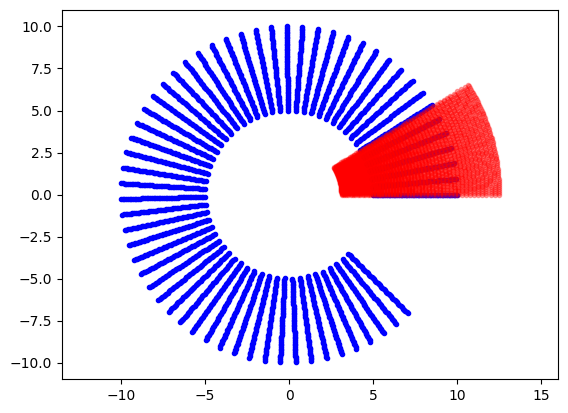

In [41]:
plt.figure()
plt.plot(XX, YY, '.', color='blue', alpha=1)
plt.plot(xx, yy, '.', color='red', alpha=1/3)
plt.axis('equal')